# Import dependencies
1. YOLO comes from the `ultralytics` package. Beyond this, you also need `OpenCV`.
2. Make sure you select a GPU instead of a CPU by selecting `Runtime > Change runtime type > GPU`. Everything still works on a CPU, but it will take a much longer time.
3. At the end of the installation, also check that the GPU is available by running the `!nvidia-smi` commend.

In [1]:
!pip install ultralytics
import cv2
from ultralytics import YOLO
import numpy as np
!nvidia-smi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 7.1 MB/s eta 0:00:00


# Use standard YOLO model for object detection on video

A good first test is to use one of the standard models provided by YOLO to do image detection on an image or on a video. Detection on a video is simply detecion on one frame at a time, treating each frame as a separate image. The end goal of this script is to produce a video with the detection boxes superimposed on the original video:

1. Import any video into COLAB by dragging and dropping to the folder on the left
2. Adjust `FILENAME_IN` to point to the imported video.
3. Run the object detection on the standard model

In [3]:
FILENAME_IN = "video.mp4"
FILENAME_OUT = "outpy.avi"

In [6]:
cap = cv2.VideoCapture(FILENAME_IN)

from google.colab.patches import cv2_imshow

# this will use the model if available, or download it
model = YOLO("yolov8m.pt")
names = model.names

# Get some properties for easier reuse
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter(FILENAME_OUT,cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

frame_counter = 0

while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == True:

            # Detection code
            results = model(frame)
            result = results[0]
            bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
            classes = np.array(result.boxes.cls.cpu(), dtype="int")
            # For each detected box, draw it and show the actual name of the class
            for cls, bbox in zip(classes, bboxes):
                (x, y, x2, y2) = bbox
                name = names[int(cls)]
                cv2.rectangle(frame, (x,y), (x2, y2), (0, 0, 225), 2)
                cv2.putText(frame, name, (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

            out.write(frame)
            # To display images, uncomment
            # cv2_imshow(frame)

            # Press Q on keyboard to exit
            key = cv2.waitKey(1)
            if key == ord('q'):
                break

        # Break the loop
        else:
            break

out.release()
cap.release()
cv2.destroyAllWindows()

# the following line is necessary to make the script work on jupyter notebooks/ipython, due to the interactivity
cv2.waitKey(1)


0: 384x640 2 cups, 1 dining table, 2 keyboards, 123.3ms
Speed: 14.6ms preprocess, 123.3ms inference, 43.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 1 dining table, 2 keyboards, 26.1ms
Speed: 5.5ms preprocess, 26.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 1 dining table, 2 keyboards, 26.6ms
Speed: 7.0ms preprocess, 26.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 1 dining table, 2 keyboards, 26.1ms
Speed: 3.3ms preprocess, 26.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 1 dining table, 2 keyboards, 26.0ms
Speed: 3.7ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 1 dining table, 1 laptop, 2 keyboards, 26.2ms
Speed: 4.7ms preprocess, 26.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 1 dining table, 1 laptop, 1 keyboard, 26.0ms
Spe

-1

# Train a custom model

The next step is to create a customised model. This means, fundamentally, that you will have an archive of tagged images. The tagging could be done with Label Studio or any other similar product.

In this example, I'm using Roboflow's football players detection dataset, which is able to pick football players on a video.

The PATH here refers to the fact that I've connected Google Drive, which is recommended.

What this notebook does:
1. It trains a custo model
2. It displays some results (which YOLO builds as parts of the process)
3. It validates the custom model
4. It shows how to make a detection/inference example on multiple images
5. It displays the validation results.
6. It shows how to run inference on a video.

In [8]:
PATH = "/content/drive/MyDrive/Colab Notebooks/football-players-roboflow"

In [9]:
# Yolo also offers detection via CLI. Here's how it would work on a single image:
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

In [10]:
# 1 - Training, specifying epochs and other parameters.
# At the end of the final epoch, the models generated will be under runs/detect/train in the dataset folder
!yolo task=detect mode=train model=yolov8n.pt data="/content/drive/MyDrive/Colab Notebooks/football-players-roboflow/data.yaml" \
epochs=25 imgsz=1280 plots=True

100% 6.23M/6.23M [00:00<00:00, 83.5MB/s]
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/football-players-roboflow/data.yaml, epochs=25, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

/content


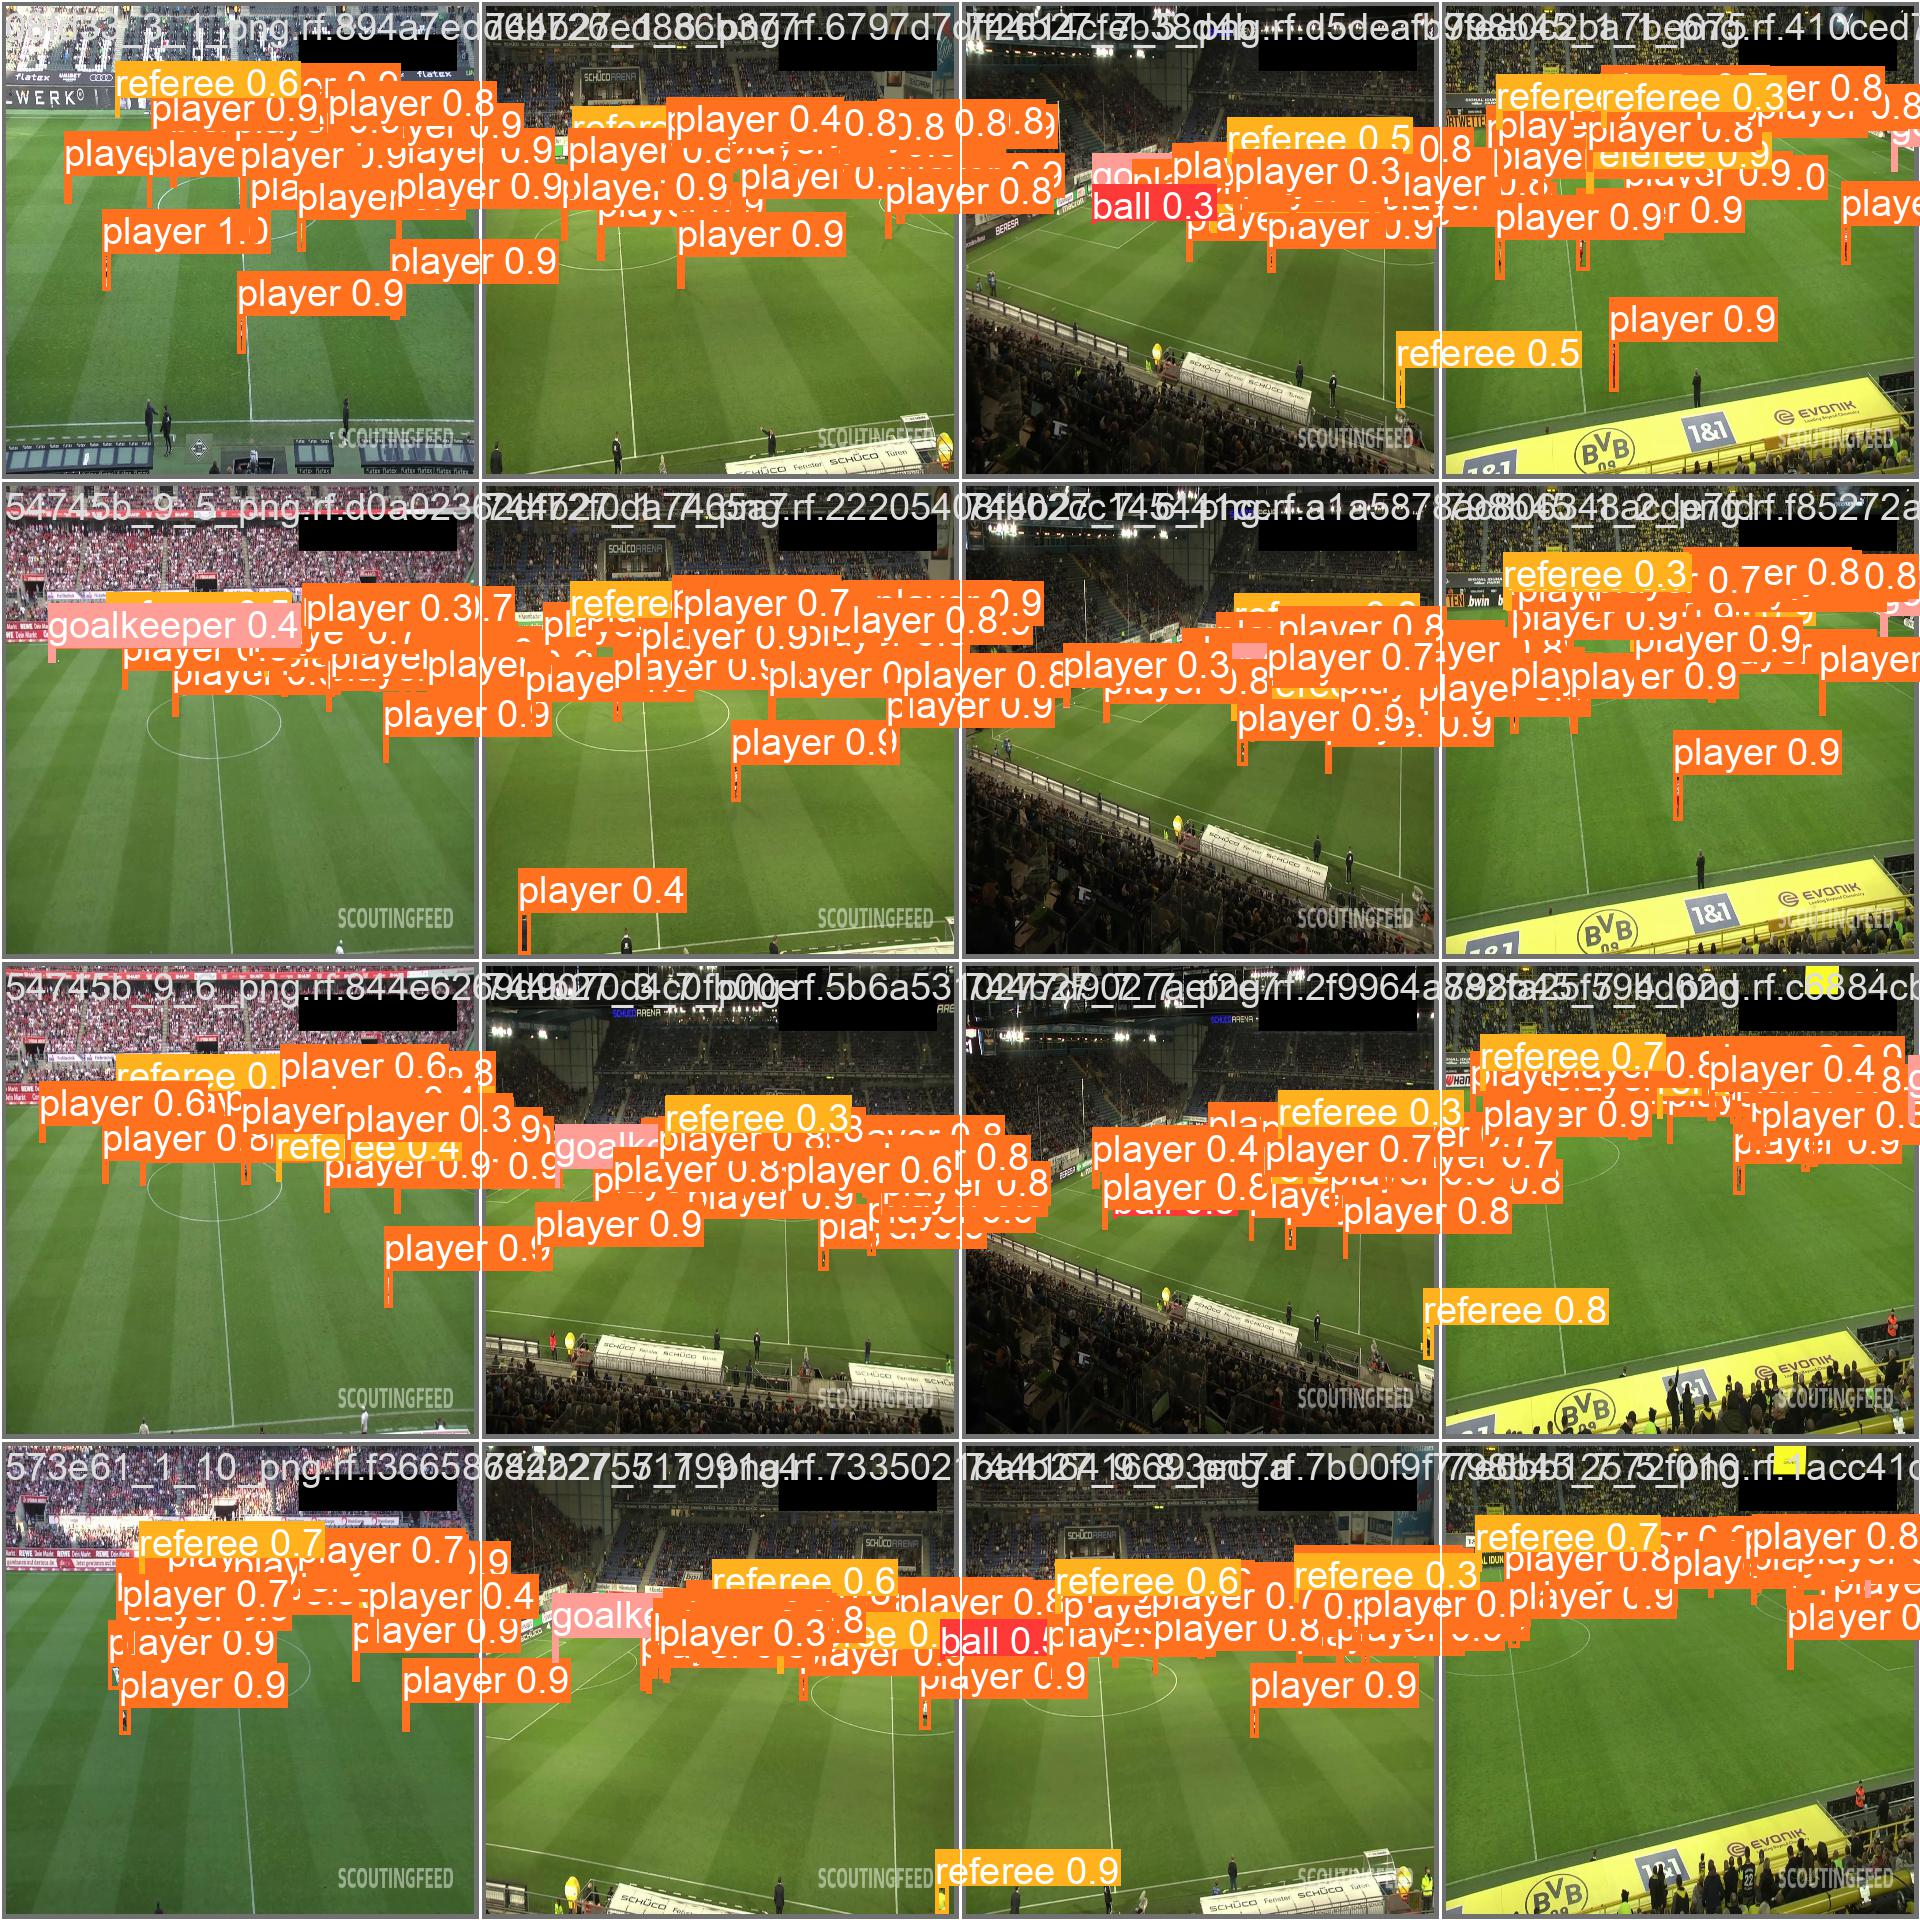

In [11]:
# 2 - Displaying built-in results
import os
HOME = os.getcwd()
from IPython.display import display, Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
# 3 - Validate the custom model
# Note: this is done automatically at the end of the training stage, so it should already appear above
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data="/content/drive/MyDrive/Colab Notebooks/football-players-roboflow/data.yaml"

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Colab Notebooks/football-players-roboflow/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:07<00:00,  2.60s/it]
                   all         38        905      0.968      0.782      0.862      0.642
                  ball         38         35          1       0.38       0.53       0.27
            goalkeeper         38         27      0.959      0.852      0.969      0.791
                player         38        754       0.98      0.976      0.993      0.822
               referee         38         89      0.934      0.921      0.955      0.683
Speed: 31.2ms preprocess, 52.4ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/dete

In [13]:
# 4 - Example of detection on one image
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/Colab Notebooks/football-players-roboflow/test/images" save=True

# Show inference results
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Or, for one
# Image(filename=f'/content/runs/detect/predict/40cd38_7_6_png.rf.dc7957fcce915bc48188f18a7b19455b.jpg', width=600)

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients

image 1/13 /content/drive/MyDrive/Colab Notebooks/football-players-roboflow/test/images/40cd38_7_6_png.rf.dc7957fcce915bc48188f18a7b19455b.jpg: 1280x1280 1 goalkeeper, 22 players, 2 referees, 20.3ms
image 2/13 /content/drive/MyDrive/Colab Notebooks/football-players-roboflow/test/images/42ba34_1_5_png.rf.927d602c034ce2997f58f62a7c1245ba.jpg: 1280x1280 2 balls, 1 goalkeeper, 20 players, 3 referees, 19.5ms
image 3/13 /content/drive/MyDrive/Colab Notebooks/football-players-roboflow/test/images/42ba34_5_5_png.rf.f691b18c36a92663c7241c99d4202bcc.jpg: 1280x1280 1 ball, 1 goalkeeper, 22 players, 1 referee, 19.5ms
image 4/13 /content/drive/MyDrive/Colab Notebooks/football-players-roboflow/test/images/4b770a_1_4_png.rf.8a0f6be9776a652d40938181f60b3a6c.jpg: 1280x1280 1 goalkeeper, 20 players, 3 referees, 19.6ms
image 5/13 /content/drive/MyDrive

In [17]:
# 5 - Detection on a video of a football match, e.g. any video from https://www.pexels.com/search/videos/football/
# This will produce a video with the detection boxes

FILENAME_IN = "/content/drive/MyDrive/Colab Notebooks/videofootball.mp4"
FILENAME_OUT = "outfootball.avi"

# select the "best" model that YOLO has just created
MODEL = "/content/runs/detect/train/weights/best.pt"
cap = cv2.VideoCapture(FILENAME_IN)

from google.colab.patches import cv2_imshow
model = YOLO(MODEL)
names = model.names

# Get some properties for easier reuse
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter(FILENAME_OUT,cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

frame_counter = 0

while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == True:

            # Detection code
            results = model(frame)
            result = results[0]
            bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
            classes = np.array(result.boxes.cls.cpu(), dtype="int")
            # For each detected box, draw it and show the actual name of the class
            for cls, bbox in zip(classes, bboxes):
                (x, y, x2, y2) = bbox
                name = names[int(cls)]
                cv2.rectangle(frame, (x,y), (x2, y2), (0, 0, 225), 2)
                cv2.putText(frame, name, (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

            out.write(frame)
            # To display images, uncomment
            # cv2_imshow(frame)

            # Press Q on keyboard to exit
            key = cv2.waitKey(1)
            if key == ord('q'):
                break

        # Break the loop
        else:
            break

out.release()
cap.release()
cv2.destroyAllWindows()

# the following line is necessary to make it work on jupyter notebooks/ipython
cv2.waitKey(1)


0: 736x1280 3 balls, 1 goalkeeper, 30 players, 1 referee, 22.7ms
Speed: 7.5ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 3 balls, 1 goalkeeper, 26 players, 2 referees, 14.4ms
Speed: 5.7ms preprocess, 14.4ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 3 balls, 1 goalkeeper, 27 players, 2 referees, 12.4ms
Speed: 10.1ms preprocess, 12.4ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 4 balls, 1 goalkeeper, 32 players, 2 referees, 23.3ms
Speed: 8.5ms preprocess, 23.3ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 4 balls, 1 goalkeeper, 27 players, 1 referee, 12.4ms
Speed: 6.3ms preprocess, 12.4ms inference, 4.7ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 4 balls, 1 goalkeeper, 27 players, 1 referee, 12.5ms
Speed: 6.2ms preprocess, 12.5ms inference, 2.8ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280

-1